<a href="https://colab.research.google.com/github/Alla-tech/VKR/blob/main/%D0%92%D0%9A%D0%A0_%D1%87%D0%B0%D1%81%D1%82%D1%8C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

In [ ]:
from sklearn import preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, LabelEncoder, StandardScaler

Скачивание файла, созданного по резулататам части 1

In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/resultpart1.xlsx")

3. Предобработка данных

3.1 Удаление шумов

In [ ]:
#Переменная для всех столбцов
df.columns
column_names = df.columns

In [ ]:
#Количество значений, которые можно отнести к выбросам с разбивкой по признакам
m = df.copy()
for i in df.columns:
    m[i] = abs((df[i] - df[i].mean()) / df[i].std())
    print(f"{sum(m[i] > 3)} выбросов в признаке {i}")
print(f' Всего {sum(sum(m.values > 3))} выброса')

0 выбросов в признаке Unnamed: 0
0 выбросов в признаке Соотношение матрица-наполнитель
3 выбросов в признаке Плотность, кг/м3
2 выбросов в признаке модуль упругости, ГПа
2 выбросов в признаке Количество отвердителя, м.%
2 выбросов в признаке Содержание эпоксидных групп,%_2
3 выбросов в признаке Температура вспышки, С_2
2 выбросов в признаке Поверхностная плотность, г/м2
0 выбросов в признаке Модуль упругости при растяжении, ГПа
0 выбросов в признаке Прочность при растяжении, МПа
3 выбросов в признаке Потребление смолы, г/м2
0 выбросов в признаке Угол нашивки, град
0 выбросов в признаке Шаг нашивки
7 выбросов в признаке Плотность нашивки
 Всего 24 выброса


In [ ]:
#Переменная со списком всех параметров
df.columns
column_list_drop = ["Соотношение матрица-наполнитель",
                 "Плотность, кг/м3",
                 "модуль упругости, ГПа",
                 "Количество отвердителя, м.%",
                 "Содержание эпоксидных групп,%_2",
                 "Температура вспышки, С_2",
                 "Поверхностная плотность, г/м2",
                 "Модуль упругости при растяжении, ГПа",
                 "Прочность при растяжении, МПа",
                 "Потребление смолы, г/м2",
                 "Шаг нашивки",
                 "Плотность нашивки"]

In [ ]:
#Удаление выбросов методом межквартильного расстояния
for i in column_list_drop:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan

In [ ]:
#Посмотрим на кол-во выбросов по каждому из параметров
df.isnull().sum()

Unnamed: 0                               0
Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [ ]:
#Удаление строк c выбросами
df = df.dropna(axis=0)

In [ ]:
#Снова посмотрим на кол-во выбросов по каждому из параметров
df.isnull().sum()

Unnamed: 0                              0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
#Просмотр информации о содержимом файла
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            936 non-null    int64  
 1   Соотношение матрица-наполнитель       936 non-null    float64
 2   Плотность, кг/м3                      936 non-null    float64
 3   модуль упругости, ГПа                 936 non-null    float64
 4   Количество отвердителя, м.%           936 non-null    float64
 5   Содержание эпоксидных групп,%_2       936 non-null    float64
 6   Температура вспышки, С_2              936 non-null    float64
 7   Поверхностная плотность, г/м2         936 non-null    float64
 8   Модуль упругости при растяжении, ГПа  936 non-null    float64
 9   Прочность при растяжении, МПа         936 non-null    float64
 10  Потребление смолы, г/м2               936 non-null    float64
 11  Угол нашивки, град

In [ ]:
#Размер матрицы после удаления выбросов
df.shape

(936, 14)

In [ ]:
# Проверим есть ли пропущенные данные
df.isnull().sum()

Unnamed: 0                              0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
# Проверим датасет на дубликаты
df.duplicated().sum()

0

Оценка плотности ядра

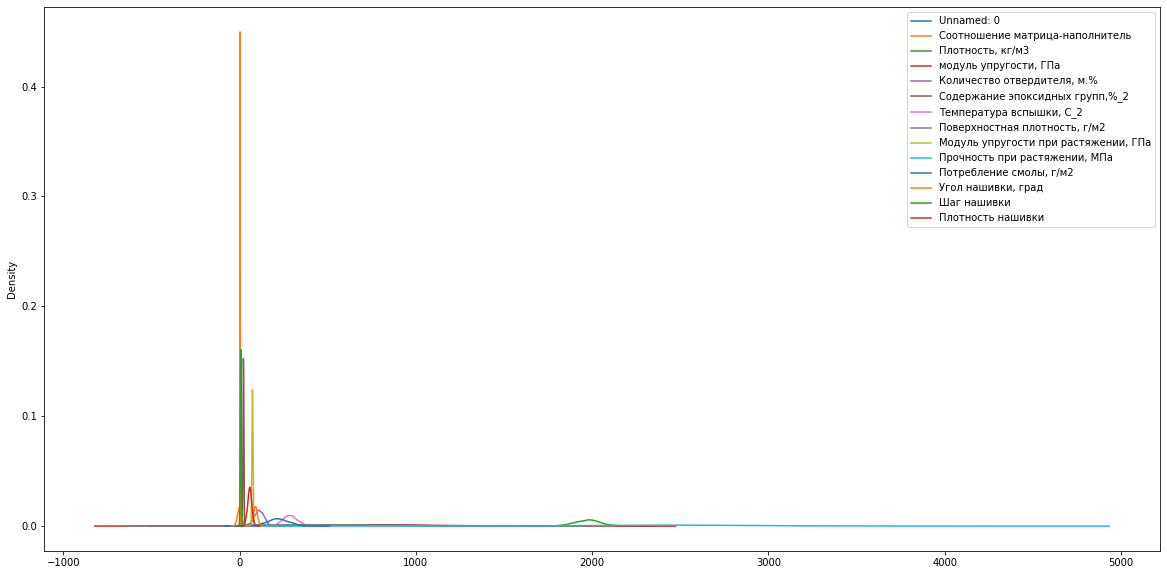

In [ ]:
def plt_kde(df):
  fig, ax = plt.subplots(figsize=(20, 10))
  df.plot(kind='kde', ax=ax)
plt_kde(df)

In [ ]:
#Сохранение в excel и в csv формат файл без выбросов
df.to_csv('/content/drive/MyDrive/Result2.csv', encoding = 'cp1251' )
df.to_excel("/content/drive/MyDrive/Result2.xlsx")

3.2 Нормализация данных

In [ ]:
#Подготовка датасета для проведения нормализации
df_norm = df.copy()
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            936 non-null    int64  
 1   Соотношение матрица-наполнитель       936 non-null    float64
 2   Плотность, кг/м3                      936 non-null    float64
 3   модуль упругости, ГПа                 936 non-null    float64
 4   Количество отвердителя, м.%           936 non-null    float64
 5   Содержание эпоксидных групп,%_2       936 non-null    float64
 6   Температура вспышки, С_2              936 non-null    float64
 7   Поверхностная плотность, г/м2         936 non-null    float64
 8   Модуль упругости при растяжении, ГПа  936 non-null    float64
 9   Прочность при растяжении, МПа         936 non-null    float64
 10  Потребление смолы, г/м2               936 non-null    float64
 11  Угол нашивки, град

In [ ]:
#Нормализация данных с помощью MinMaxScaler 
scaler = preprocessing.MinMaxScaler()
col = df.columns
result = scaler.fit_transform(df)

df_minmax_n = pd.DataFrame(result, columns = col)
df_minmax_n.describe()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.507333,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141,0.511752,0.502232,0.513776
std,0.291137,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781,0.500129,0.183258,0.191342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254407,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067,0.000000,0.372211,0.390482
50%,0.517140,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766,1.000000,0.504258,0.516029
75%,0.759305,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447,1.000000,0.624604,0.638842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


[Text(0, 0, 'Unnamed: 0'),
 Text(0, 0, 'Соотношение матрица-наполнитель'),
 Text(0, 0, 'Плотность, кг/м3'),
 Text(0, 0, 'модуль упругости, ГПа'),
 Text(0, 0, 'Количество отвердителя, м.%'),
 Text(0, 0, 'Содержание эпоксидных групп,%_2'),
 Text(0, 0, 'Температура вспышки, С_2'),
 Text(0, 0, 'Поверхностная плотность, г/м2'),
 Text(0, 0, 'Модуль упругости при растяжении, ГПа'),
 Text(0, 0, 'Прочность при растяжении, МПа'),
 Text(0, 0, 'Потребление смолы, г/м2'),
 Text(0, 0, 'Угол нашивки, град'),
 Text(0, 0, 'Шаг нашивки'),
 Text(0, 0, 'Плотность нашивки')]

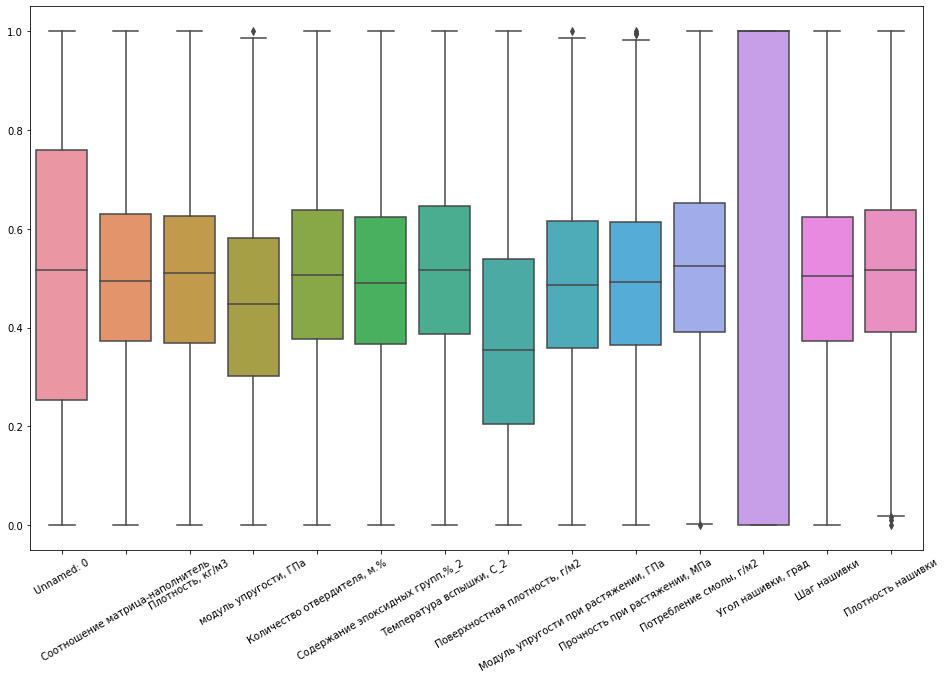

In [ ]:
#Отображение результата на ящике с усами
plt.figure(figsize = (16,10))
ax = sns.boxplot(data = df_minmax_n)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [ ]:
#Нормализация данных с помощью Normalizer
normalizer = Normalizer()
res = normalizer.fit_transform(df)
df_norm_n = pd.DataFrame(res, columns = df.columns)
df_norm_n

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.000269,0.000499,0.545436,0.198490,0.013434,0.006381,0.076473,0.056424,0.018808,0.806064,0.059111,0.000000,0.001075,0.016121
1,0.000805,0.000499,0.545011,0.198335,0.034634,0.005705,0.080543,0.056380,0.018793,0.805435,0.059065,0.000000,0.001342,0.012618
2,0.001074,0.000744,0.544829,0.202097,0.030022,0.005976,0.076388,0.056362,0.018787,0.805166,0.059046,0.000000,0.001342,0.015298
3,0.001348,0.000746,0.539270,0.201687,0.030161,0.006004,0.076742,0.056623,0.018874,0.808905,0.059320,0.000000,0.001348,0.016178
4,0.001633,0.000699,0.519918,0.219672,0.030449,0.006062,0.077475,0.057164,0.019055,0.816626,0.059886,0.000000,0.001361,0.019055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.299308,0.000668,0.573944,0.268394,0.025577,0.005917,0.095489,0.061508,0.021490,0.701901,0.036754,0.026461,0.002669,0.013825
932,0.303807,0.001027,0.611217,0.132593,0.043523,0.005844,0.075792,0.104547,0.021741,0.703732,0.035100,0.026833,0.003150,0.016025
933,0.284079,0.000914,0.549323,0.116093,0.030785,0.006672,0.069188,0.206136,0.020814,0.741643,0.065897,0.025066,0.001159,0.018835
934,0.311842,0.001132,0.631259,0.226467,0.043187,0.005879,0.084231,0.195922,0.022615,0.632760,0.060208,0.027489,0.001928,0.017795


[Text(0, 0, 'Unnamed: 0'),
 Text(0, 0, 'Соотношение матрица-наполнитель'),
 Text(0, 0, 'Плотность, кг/м3'),
 Text(0, 0, 'модуль упругости, ГПа'),
 Text(0, 0, 'Количество отвердителя, м.%'),
 Text(0, 0, 'Содержание эпоксидных групп,%_2'),
 Text(0, 0, 'Температура вспышки, С_2'),
 Text(0, 0, 'Поверхностная плотность, г/м2'),
 Text(0, 0, 'Модуль упругости при растяжении, ГПа'),
 Text(0, 0, 'Прочность при растяжении, МПа'),
 Text(0, 0, 'Потребление смолы, г/м2'),
 Text(0, 0, 'Угол нашивки, град'),
 Text(0, 0, 'Шаг нашивки'),
 Text(0, 0, 'Плотность нашивки')]

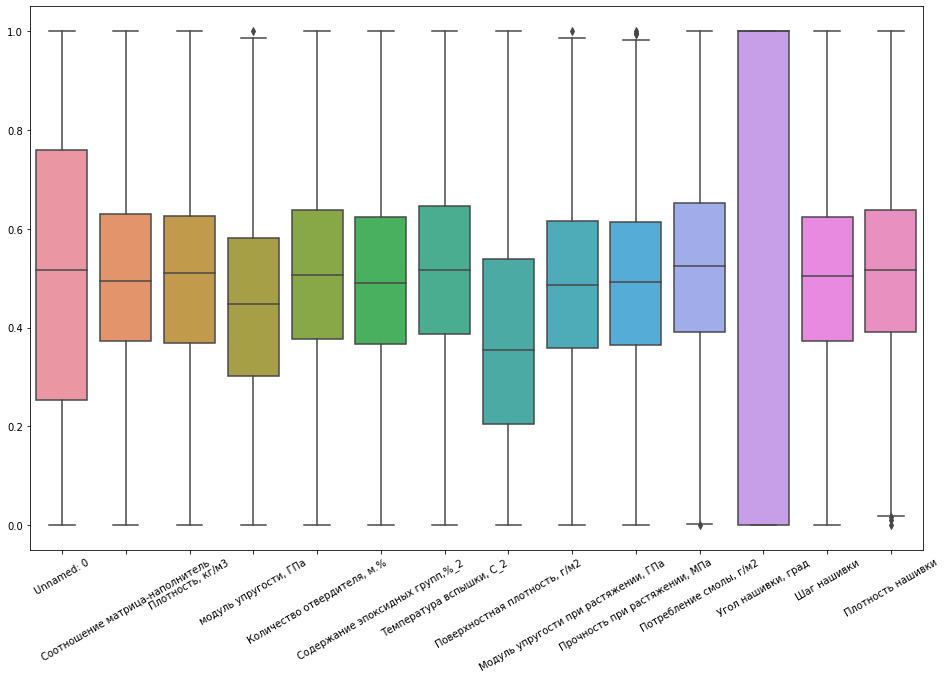

In [ ]:
#Отображение результата на ящике с усами
plt.figure(figsize = (16,10))
ax = sns.boxplot(data = df_minmax_n)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

3.3 Стандартизация данных

In [ ]:
#Назначаем переменные
X1 = df_minmax_n.copy()
X2 = df_norm_n.copy()

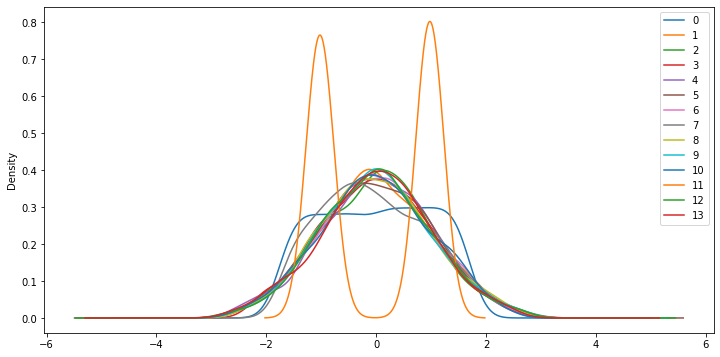

In [ ]:
df_std_X1 = preprocessing.StandardScaler().fit(X1)
df_standart_X1 = df_std_X1.transform(X1)
df_standart_1 = pd.DataFrame(df_standart_X1)
fig, ax = plt.subplots(figsize = (12, 6))
df_standart_1.plot(kind = 'kde', ax = ax)

In [ ]:
#Просмотр матрицы
df_standart_1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.743527,-1.196260,0.790727,0.001489,-2.254199,0.643790,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-1.162360,0.226834
1,-1.736795,-1.196260,0.790727,0.001489,0.669189,-0.400666,0.354488,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,-0.930436
2,-1.733429,-0.172802,0.790727,0.044904,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,-0.040228
3,-1.730063,-0.176623,0.366820,0.029685,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,0.226834
4,-1.726697,-0.398622,-0.904900,0.209271,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.023787,-0.763689,1.117043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1.679660,-0.732548,-0.310188,0.531478,-0.885307,-0.871403,0.983609,-0.977698,-0.070548,-0.172989,-1.602276,0.976766,0.861447,-0.928676
932,1.683026,0.580295,1.074592,-0.893411,1.297605,-1.090103,-0.808159,-0.472549,-0.126591,-0.231014,-1.728193,0.976766,1.455162,-0.329475
933,1.686392,0.397344,-0.023557,-0.978322,-0.014163,0.730480,-0.955250,0.918256,0.470794,0.421529,0.328626,0.976766,-1.098113,0.906035
934,1.689758,0.872860,1.310716,0.009825,1.127974,-1.237507,-0.260555,0.565897,0.242965,-0.853711,-0.354474,0.976766,-0.240153,0.072034


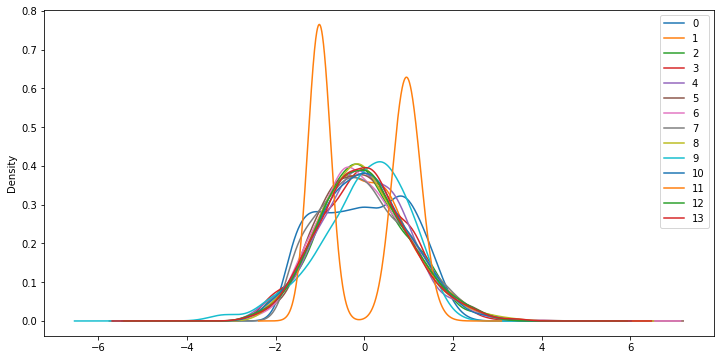

In [ ]:
df_std_X2 = preprocessing.StandardScaler().fit(X2)
df_standart_X2 = df_std_X2.transform(X2)
df_standart_2 = pd.DataFrame(df_standart_X2)
fig, ax = plt.subplots(figsize = (12, 6))
df_standart_2.plot(kind = 'kde', ax=ax)

In [ ]:
#Просмотр матрицы
df_standart_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.744321,-1.320151,-0.651359,-0.195253,-2.209448,-0.221498,-0.580935,-1.043442,-1.222372,1.215548,-0.300982,-1.012682,-1.240772,-0.250589
1,-1.738185,-1.321541,-0.658089,-0.196891,0.184090,-0.900284,-0.304021,-1.043975,-1.228393,1.206668,-0.303505,-1.012682,-0.903630,-1.184072
2,-1.735120,-0.446475,-0.660960,-0.157121,-0.336603,-0.627956,-0.586727,-1.044202,-1.230961,1.202881,-0.304582,-1.012682,-0.904194,-0.469946
3,-1.731981,-0.437432,-0.748842,-0.161452,-0.320862,-0.600096,-0.562597,-1.041034,-1.195179,1.255653,-0.289583,-1.012682,-0.896344,-0.235444
4,-1.728722,-0.604653,-1.054777,0.028681,-0.288360,-0.542568,-0.512771,-1.034492,-1.121297,1.364617,-0.258615,-1.012682,-0.880135,0.531132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1.674079,-0.717650,-0.200673,0.543742,-0.838462,-0.688080,0.712642,-0.981912,-0.122514,-0.254564,-1.523893,0.968048,0.766975,-0.862658
932,1.725504,0.563573,0.388582,-0.891878,1.187790,-0.761400,-0.627224,-0.460952,-0.019627,-0.228728,-1.614362,0.995846,1.373457,-0.276150
933,1.499992,0.159822,-0.589915,-1.066317,-0.250504,0.070660,-1.076481,0.768727,-0.399646,0.306330,0.070190,0.863581,-1.134749,0.472731
934,1.817361,0.937992,0.705419,0.100516,1.149806,-0.726218,-0.053180,0.645095,0.338817,-1.230397,-0.241004,1.044932,-0.165657,0.195339


In [ ]:
#Просмотр после нормализации данных
df_minmax_n.describe()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.507333,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141,0.511752,0.502232,0.513776
std,0.291137,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781,0.500129,0.183258,0.191342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254407,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067,0.000000,0.372211,0.390482
50%,0.517140,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766,1.000000,0.504258,0.516029
75%,0.759305,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447,1.000000,0.624604,0.638842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Просмотр после нормализации данных
df_norm_n.describe()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.152861,0.000869,0.586638,0.216959,0.033003,0.006602,0.085013,0.142628,0.021789,0.719938,0.064614,0.013529,0.002060,0.017062
std,0.087526,0.000280,0.063288,0.094644,0.008862,0.000997,0.014708,0.082659,0.002440,0.070891,0.018292,0.013367,0.000794,0.003754
min,0.000269,0.000161,0.442195,0.000701,0.009464,0.004098,0.049217,0.000229,0.015914,0.462892,0.017223,0.000000,0.000011,0.007138
25%,0.076591,0.000672,0.542140,0.148386,0.027119,0.005886,0.074725,0.079034,0.020069,0.677746,0.051807,0.000000,0.001498,0.014544
50%,0.153663,0.000857,0.583093,0.217424,0.032849,0.006551,0.083822,0.137476,0.021617,0.728174,0.064389,0.021134,0.002031,0.017024
75%,0.226785,0.001047,0.627638,0.283935,0.038987,0.007242,0.095255,0.200264,0.023380,0.771673,0.076848,0.026328,0.002565,0.019417
max,0.354189,0.001803,0.796622,0.524824,0.062843,0.010546,0.143003,0.414069,0.030433,0.874715,0.122192,0.036567,0.004517,0.029960


In [ ]:
#Сохранение файла с нормализованными данными для дальнейшей работы с ним
df_norm_n.to_excel(r"/content/drive/MyDrive/resultpart_2.xlsx")